# Please note: This work was finished on the 24th of August, 2022 and was last updated then. 

# Import all the necessary libraries

In [1]:
import glob
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

# Scrape the Nigerian Centre for Disease Control's Website to extract an up-to-date information for the COVID-19 cases in the country and after that, sort the data and convert it to a pandas dataframe

In [2]:
try: 
    source = requests.get('https://covid19.ncdc.gov.ng/')
    source.raise_for_status()
    soup = BeautifulSoup(source.text, 'html.parser')
    cases = soup.find('table', id="custom1").find_all('tr')
    headers = cases[0].find_all('th')
    print(headers)
except Exception as e:
  print(e)

[<th>States Affected</th>, <th>No. of Cases (Lab Confirmed)</th>, <th>No. of Cases (on admission)</th>, <th>No. Discharged</th>, <th>No. of Deaths</th>]


In [3]:
column_names = []
for header in headers:
  header = header.text #converts html codes into readable text to work
  header = header.strip('\n')
  column_names.append(header)
print(column_names)

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [4]:
print(cases)

[<tr>
<th>States Affected</th>
<th>No. of Cases (Lab Confirmed)</th>
<th>No. of Cases (on admission)</th>
<th>No. Discharged</th>
<th>No. of Deaths</th>
</tr>, <tr>
<td>
Lagos
</td>
<td>102,877
</td>
<td>129
</td>
<td>101,977
</td>
<td>771
</td>
</tr>, <tr>
<td>
FCT
</td>
<td>29,075
</td>
<td>146
</td>
<td>28,680
</td>
<td>249
</td>
</tr>, <tr>
<td>
Rivers
</td>
<td>17,680
</td>
<td>262
</td>
<td>17,264
</td>
<td>154
</td>
</tr>, <tr>
<td>
Kaduna
</td>
<td>11,467
</td>
<td>11
</td>
<td>11,367
</td>
<td>89
</td>
</tr>, <tr>
<td>
Oyo
</td>
<td>10,327
</td>
<td>6
</td>
<td>10,119
</td>
<td>202
</td>
</tr>, <tr>
<td>
Plateau
</td>
<td>10,292
</td>
<td>18
</td>
<td>10,199
</td>
<td>75
</td>
</tr>, <tr>
<td>
Edo
</td>
<td>7,821
</td>
<td>102
</td>
<td>7,398
</td>
<td>321
</td>
</tr>, <tr>
<td>
Ogun
</td>
<td>5,810
</td>
<td>11
</td>
<td>5,717
</td>
<td>82
</td>
</tr>, <tr>
<td>
Delta
</td>
<td>5,631
</td>
<td>349
</td>
<td>5,170
</td>
<td>112
</td>
</tr>, <tr>
<td>
Ondo
</td>
<td>5,173
</td>

In [5]:
data = []
for case in cases[1:]:
  numbers = case.find_all('td')
  dt = ()
  for smaller_numbers in numbers:
    smaller_numbers = smaller_numbers.text
    smaller_numbers = smaller_numbers.strip()
    smaller_numbers = smaller_numbers.replace('\n', ' ')
    print(smaller_numbers)
    dt = dt + (smaller_numbers,)
  data.append(dt)


Lagos
102,877
129
101,977
771
FCT
29,075
146
28,680
249
Rivers
17,680
262
17,264
154
Kaduna
11,467
11
11,367
89
Oyo
10,327
6
10,119
202
Plateau
10,292
18
10,199
75
Edo
7,821
102
7,398
321
Ogun
5,810
11
5,717
82
Delta
5,631
349
5,170
112
Ondo
5,173
315
4,749
109
Kano
5,169
41
5,001
127
Akwa Ibom
4,973
22
4,907
44
Kwara
4,680
441
4,175
64
Osun
3,311
36
3,183
92
Gombe
3,310
6
3,238
66
Enugu
2,952
13
2,910
29
Anambra
2,825
46
2,760
19
Nasarawa
2,777
393
2,345
39
Imo
2,655
7
2,590
58
Ekiti
2,447
46
2,373
28
Katsina
2,418
0
2,381
37
Abia
2,226
11
2,181
34
Benue
2,129
340
1,764
25
Ebonyi
2,064
28
2,004
32
Bauchi
1,979
8
1,947
24
Borno
1,629
5
1,580
44
Taraba
1,473
62
1,377
34
Bayelsa
1,363
10
1,325
28
Adamawa
1,203
68
1,103
32
Niger
1,150
132
998
20
Cross River
873
3
845
25
Sokoto
822
0
794
28
Jigawa
669
2
649
18
Yobe
638
4
625
9
Kebbi
480
10
454
16
Zamfara
375
0
366
9
Kogi
5
0
3
2


In [6]:
data

[('Lagos', '102,877', '129', '101,977', '771'),
 ('FCT', '29,075', '146', '28,680', '249'),
 ('Rivers', '17,680', '262', '17,264', '154'),
 ('Kaduna', '11,467', '11', '11,367', '89'),
 ('Oyo', '10,327', '6', '10,119', '202'),
 ('Plateau', '10,292', '18', '10,199', '75'),
 ('Edo', '7,821', '102', '7,398', '321'),
 ('Ogun', '5,810', '11', '5,717', '82'),
 ('Delta', '5,631', '349', '5,170', '112'),
 ('Ondo', '5,173', '315', '4,749', '109'),
 ('Kano', '5,169', '41', '5,001', '127'),
 ('Akwa Ibom', '4,973', '22', '4,907', '44'),
 ('Kwara', '4,680', '441', '4,175', '64'),
 ('Osun', '3,311', '36', '3,183', '92'),
 ('Gombe', '3,310', '6', '3,238', '66'),
 ('Enugu', '2,952', '13', '2,910', '29'),
 ('Anambra', '2,825', '46', '2,760', '19'),
 ('Nasarawa', '2,777', '393', '2,345', '39'),
 ('Imo', '2,655', '7', '2,590', '58'),
 ('Ekiti', '2,447', '46', '2,373', '28'),
 ('Katsina', '2,418', '0', '2,381', '37'),
 ('Abia', '2,226', '11', '2,181', '34'),
 ('Benue', '2,129', '340', '1,764', '25'),
 ('Eb

In [7]:
data = pd.DataFrame(data=data, columns=column_names)

In [8]:
data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"102,877",129,"101,977",771
1,FCT,"29,075",146,"28,680",249
2,Rivers,"17,680",262,"17,264",154
3,Kaduna,"11,467",11,"11,367",89
4,Oyo,"10,327",6,"10,119",202
5,Plateau,"10,292",18,"10,199",75
6,Edo,"7,821",102,"7,398",321
7,Ogun,"5,810",11,"5,717",82
8,Delta,"5,631",349,"5,170",112
9,Ondo,"5,173",315,"4,749",109


# Import the other external data from the John Hopkins' Data Repository and 'https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases'

In [9]:
import os
os.chdir('C:\\Users\\Oreoluwa')

In [10]:
confirmed_cases = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [11]:
recovered_cases = pd.read_csv('time_series_covid19_recovered_global.csv')

In [12]:
death_cases = pd.read_csv('time_series_covid19_deaths_global.csv')

In [13]:
covid_external = pd.read_csv('covid_external.csv')

In [14]:
Budget_data = pd.read_csv('Budget data.csv')

In [15]:
RealGDP = pd.read_csv('RealGDP.csv')

In [16]:
covidnig = pd.read_csv('covidnig.csv')

# Viewing the downloaded data using the head() and the info() method 

In [17]:
confirmed_cases.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,188820,189045,189343,189477,189710,190010,190254,190435,190643,191040
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,321345,321804,322125,322837,323282,323829,325241,325736,326077,326181
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,269008,269141,269269,269381,269473,269556,269650,269731,269805,269894
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45899,45899,45899,45899,45975,45975,45975,45975,45975,45975
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [18]:
recovered_cases.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
death_cases.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7758,7758,7759,7759,7759,7759,7759,7759,7762,7767
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3570,3571,3571,3573,3574,3574,3575,3576,3576,3576
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [20]:
covid_external.head(5)

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [21]:
Budget_data.head(5)

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [22]:
RealGDP.head(5)

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [23]:
covidnig.head(5)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [24]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 948 entries, Province/State to 8/22/22
dtypes: float64(2), int64(944), object(2)
memory usage: 2.1+ MB


In [25]:
recovered_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Columns: 948 entries, Province/State to 8/22/22
dtypes: float64(2), int64(944), object(2)
memory usage: 2.0+ MB


In [26]:
death_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 948 entries, Province/State to 8/22/22
dtypes: float64(2), int64(944), object(2)
memory usage: 2.1+ MB


In [27]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [28]:
Budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [29]:
RealGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [30]:
covidnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


# Renaming the columns of the scrapped data

In [31]:
data.rename(columns={'States Affected':'States'}, inplace=True)
data.rename(columns={'No. of Cases (Lab Confirmed)':'Confirmed Cases'}, inplace=True)
data.rename(columns={'No. of Cases (on admission)':'Cases on Admission'}, inplace=True)
data.rename(columns={'No. Discharged':'Discharged Cases'}, inplace=True)
data.rename(columns={'No. of Deaths':'Death Cases'}, inplace=True)


data.rename(columns={'Confirmed Cases':'Confirmed_Cases'}, inplace=True)
data.rename(columns={'Cases on Admission':'Cases_on_Admission'}, inplace=True)
data.rename(columns={'Discharged Cases':'Discharged_Cases'}, inplace=True)
data.rename(columns={'Death Cases':'Death_Cases'}, inplace=True)

# Remove the commas in the numerical data of the scrapped data

In [32]:
data.Confirmed_Cases = data.Confirmed_Cases.apply(lambda x: x.replace(',',''))
data.Discharged_Cases = data.Discharged_Cases.apply(lambda x: x.replace(',',''))

In [33]:
covidnig.rename(columns={'No. of Cases (Lab Confirmed)':'Cases_Confirmed'}, inplace=True)
covidnig.rename(columns={'No. of Cases (on admission)':'Cases_on_Admission'}, inplace=True)
covidnig.rename(columns={'No. Discharged':'Discharged_Cases'}, inplace=True)

In [34]:
covidnig.Cases_Confirmed = covidnig.Cases_Confirmed.apply(lambda x: x.replace(',',''))
covidnig.Cases_on_Admission = covidnig.Cases_on_Admission.apply(lambda x: x.replace(',',''))
covidnig.Discharged_Cases = covidnig.Discharged_Cases.apply(lambda x: x.replace(',',''))
covidnig.head(5)

,States Affected,Cases_Confirmed,Cases_on_Admission,Discharged_Cases,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [35]:
recovered_cases.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Extracting Nigeria's data from the downloaded dataset

In [36]:
recovered_cases_Nigeria = recovered_cases[recovered_cases['Country/Region']=='Nigeria'] 

In [37]:
death_cases_Nigeria = [death_cases['Country/Region']=='Nigeria']

In [38]:
confirmed_cases_Nigeria = [confirmed_cases['Country/Region']=='Nigeria']

# Check and clean the scrapped data (if necessary) before proceeding 

In [39]:
data.isnull().sum()

States                0
Confirmed_Cases       0
Cases_on_Admission    0
Discharged_Cases      0
Death_Cases           0
dtype: int64

# We want to generate a plot that shows the top 10 states in terms of confirmed COVID-19 cases by laboratory test. To do this, it is important to first convert the confirmed cases to numeric type

In [40]:
top_ten = data.iloc[:10, :2]
top_ten

,States,Confirmed_Cases
0,Lagos,102877
1,FCT,29075
2,Rivers,17680
3,Kaduna,11467
4,Oyo,10327
5,Plateau,10292
6,Edo,7821
7,Ogun,5810
8,Delta,5631
9,Ondo,5173


In [41]:
top_ten['Confirmed_Cases'] = top_ten['Confirmed_Cases'].apply(pd.to_numeric)

Text(0.5, 1.0, 'The top ten states in terms of confirmed covid cases by laboratory test')

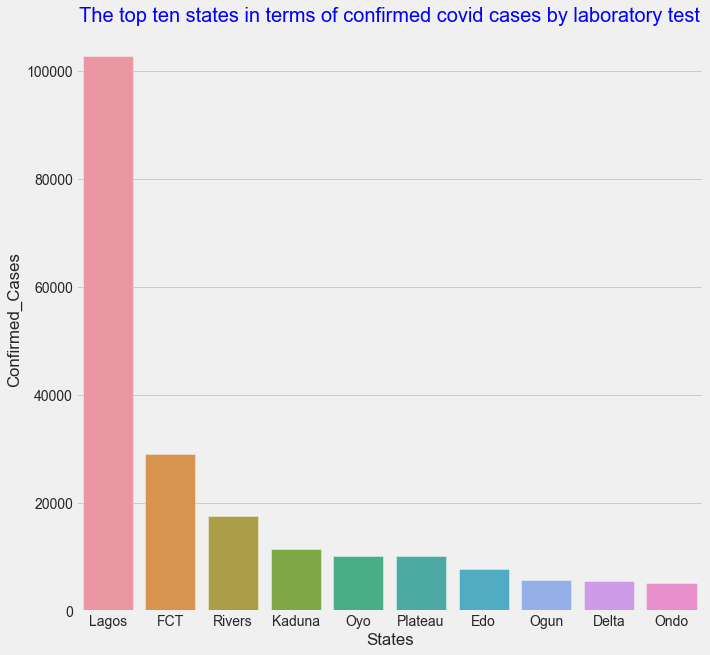

In [42]:
plt.figure(figsize=[10,10])
top_ten_image = sns.barplot(x='States', y='Confirmed_Cases', data=top_ten)
plt.title(label='The top ten states in terms of confirmed covid cases by laboratory test', fontsize=20, color='blue')

# Repeating the same process above for the discharged COVID cases in Nigeria

In [43]:
data.head()

,States,Confirmed_Cases,Cases_on_Admission,Discharged_Cases,Death_Cases
0,Lagos,102877,129,101977,771
1,FCT,29075,146,28680,249
2,Rivers,17680,262,17264,154
3,Kaduna,11467,11,11367,89
4,Oyo,10327,6,10119,202


In [44]:
top_ten_discharged = data.iloc[:10, 0:4]
top_ten_discharged

,States,Confirmed_Cases,Cases_on_Admission,Discharged_Cases
0,Lagos,102877,129,101977
1,FCT,29075,146,28680
2,Rivers,17680,262,17264
3,Kaduna,11467,11,11367
4,Oyo,10327,6,10119
5,Plateau,10292,18,10199
6,Edo,7821,102,7398
7,Ogun,5810,11,5717
8,Delta,5631,349,5170
9,Ondo,5173,315,4749


In [45]:
top_ten_discharged.drop('Confirmed_Cases', axis=1, inplace=True)
top_ten_discharged.drop('Cases_on_Admission', axis=1, inplace=True)

In [46]:
top_ten_discharged['Discharged_Cases'] = top_ten_discharged['Discharged_Cases'].apply(pd.to_numeric)

In [47]:
top_ten_discharged.sort_values(by='Discharged_Cases', ascending=False)

,States,Discharged_Cases
0,Lagos,101977
1,FCT,28680
2,Rivers,17264
3,Kaduna,11367
5,Plateau,10199
4,Oyo,10119
6,Edo,7398
7,Ogun,5717
8,Delta,5170
9,Ondo,4749


Text(0.5, 1.0, 'The top ten states in terms of discharged Covid cases')

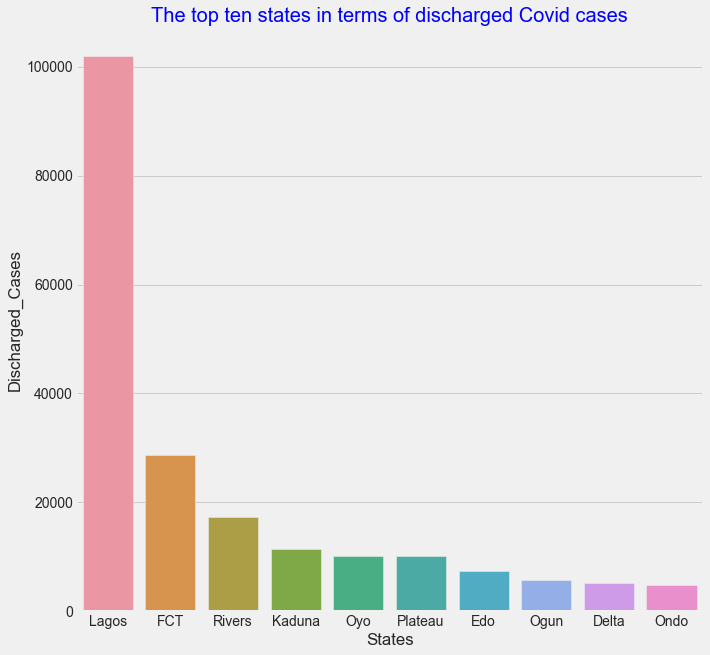

In [48]:
plt.figure(figsize=[10,10])
top_ten_discharged_image = sns.barplot(x='States', y='Discharged_Cases', data=top_ten_discharged)
plt.title(label='The top ten states in terms of discharged Covid cases', fontsize=20, color='blue')

# Repeating the same process for the top ten death cases in Nigeria

In [49]:
top_ten_death = data.iloc[0:10, 0:]

In [50]:
top_ten_death

,States,Confirmed_Cases,Cases_on_Admission,Discharged_Cases,Death_Cases
0,Lagos,102877,129,101977,771
1,FCT,29075,146,28680,249
2,Rivers,17680,262,17264,154
3,Kaduna,11467,11,11367,89
4,Oyo,10327,6,10119,202
5,Plateau,10292,18,10199,75
6,Edo,7821,102,7398,321
7,Ogun,5810,11,5717,82
8,Delta,5631,349,5170,112
9,Ondo,5173,315,4749,109


In [51]:
top_ten_death.drop('Confirmed_Cases', axis=1, inplace=True)
top_ten_death.drop('Discharged_Cases', axis=1, inplace=True)
top_ten_death.drop('Cases_on_Admission', axis=1, inplace=True)

In [52]:
top_ten_death

,States,Death_Cases
0,Lagos,771
1,FCT,249
2,Rivers,154
3,Kaduna,89
4,Oyo,202
5,Plateau,75
6,Edo,321
7,Ogun,82
8,Delta,112
9,Ondo,109


In [53]:
top_ten_death['Death_Cases'] = top_ten_death['Death_Cases'].apply(pd.to_numeric)

In [54]:
top_ten_death = top_ten_death.sort_values(by='Death_Cases', ascending=False)

Text(0.5, 1.0, 'The top ten death cases')

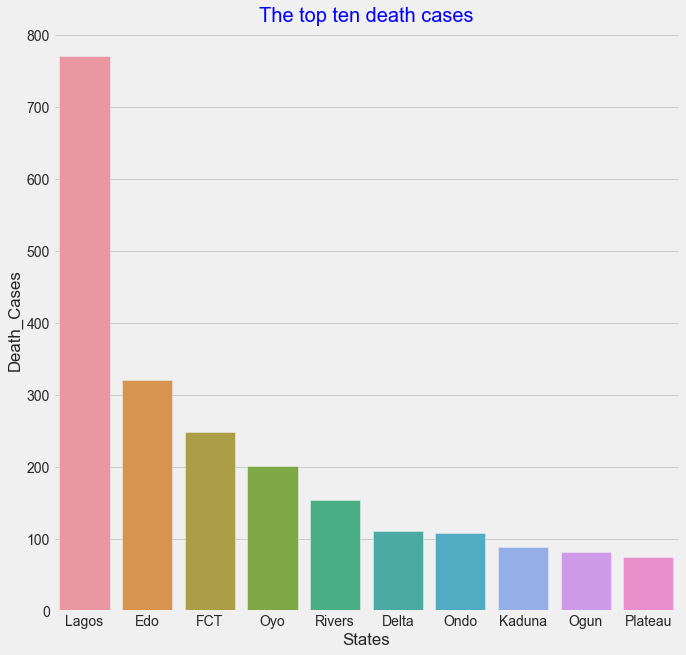

In [55]:
plt.figure(figsize=[10,10])
sns.barplot(x='States', y='Death_Cases', data=top_ten_death)
plt.title(label='The top ten death cases', fontsize=20, color='blue')

# Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [56]:
extension = 'csv'
path = (r"C:\Users\Oreoluwa\Covid_Cases")
Covid_Cases = glob.glob(path + '/*.csv')
Covid_Cases

['C:\\Users\\Oreoluwa\\Covid_Cases\\time_series_covid19_confirmed_global.csv',
 'C:\\Users\\Oreoluwa\\Covid_Cases\\time_series_covid19_deaths_global.csv',
 'C:\\Users\\Oreoluwa\\Covid_Cases\\time_series_covid19_recovered_global.csv']

In [57]:
All = []
for i in Covid_Cases:
    temp_df = pd.read_csv(i)
    All.append(temp_df)
global_cases = pd.concat(All, axis=0)

In [58]:
global_cases.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,187442,187685,187966,188202,188506,188704,188820,189045,189343,189477
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,317514,317681,318638,319444,320086,320781,321345,321804,322125,322837
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,268254,268356,268478,268584,268718,268866,269008,269141,269269,269381
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45793,45793,45793,45899,45899,45899,45899,45899,45899,45899
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [59]:
global_cases.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [60]:
global_cases.head(5)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,187442,187685,187966,188202,188506,188704,188820,189045,189343,189477
1,Albania,0,0,0,0,0,0,0,0,0,...,317514,317681,318638,319444,320086,320781,321345,321804,322125,322837
2,Algeria,0,0,0,0,0,0,0,0,0,...,268254,268356,268478,268584,268718,268866,269008,269141,269269,269381
3,Andorra,0,0,0,0,0,0,0,0,0,...,45793,45793,45793,45899,45899,45899,45899,45899,45899,45899
4,Angola,0,0,0,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [61]:
global_cases_Nigeria = global_cases[global_cases['Country/Region'] == 'Nigeria']

In [62]:
global_cases_Nigeria

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
204,Nigeria,0,0,0,0,0,0,0,0,0,...,261885,261885,261885,261885,262402,262402,262520,262520,262520,262664
204,Nigeria,0,0,0,0,0,0,0,0,0,...,3147,3147,3147,3147,3147,3147,3147,3147,3147,3147
189,Nigeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
global_cases_Nigeria = global_cases_Nigeria.set_index('Country/Region')

In [64]:
global_cases_Nigeria

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Nigeria,0,0,0,0,0,0,0,0,0,0,...,261885,261885,261885,261885,262402,262402,262520,262520,262520,262664
Nigeria,0,0,0,0,0,0,0,0,0,0,...,3147,3147,3147,3147,3147,3147,3147,3147,3147,3147
Nigeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#Renaming the index as appropriate since each row represents the confirmed cases, recovered cases, and death cases respectively
ind = list(global_cases_Nigeria.index)
ind[0] = 'Nig_Confirmed_Cases'
ind[1] = 'Nig_Death_Cases'
ind[2] = 'Nig_Recovered_Cases'
global_cases_Nigeria.index = ind
global_cases_Nigeria

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
Nig_Confirmed_Cases,0,0,0,0,0,0,0,0,0,0,...,261885,261885,261885,261885,262402,262402,262520,262520,262520,262664
Nig_Death_Cases,0,0,0,0,0,0,0,0,0,0,...,3147,3147,3147,3147,3147,3147,3147,3147,3147,3147
Nig_Recovered_Cases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
global_cases_Nigeria

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
Nig_Confirmed_Cases,0,0,0,0,0,0,0,0,0,0,...,261885,261885,261885,261885,262402,262402,262520,262520,262520,262664
Nig_Death_Cases,0,0,0,0,0,0,0,0,0,0,...,3147,3147,3147,3147,3147,3147,3147,3147,3147,3147
Nig_Recovered_Cases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
global_cases_Nigeria = global_cases_Nigeria.transpose()

In [68]:
global_cases_Nigeria.head(5)

,Nig_Confirmed_Cases,Nig_Death_Cases,Nig_Recovered_Cases
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0


In [69]:
global_cases_Nigeria.index.name = 'Dates'

In [70]:
global_cases_Nigeria.head(5)

,Nig_Confirmed_Cases,Nig_Death_Cases,Nig_Recovered_Cases
Dates,,,
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0


In [71]:
global_cases_Nigeria['Nig_Confirmed_Cases'] = global_cases_Nigeria['Nig_Confirmed_Cases'].apply(pd.to_numeric)
global_cases_Nigeria['Nig_Death_Cases'] = global_cases_Nigeria['Nig_Death_Cases'].apply(pd.to_numeric)
global_cases_Nigeria['Nig_Recovered_Cases'] = global_cases_Nigeria['Nig_Recovered_Cases'].apply(pd.to_numeric)

In [72]:
Nig_daily_1 = global_cases_Nigeria['Nig_Confirmed_Cases'].diff()
global_cases_Nigeria['Nig_Daily_Confirmed'] = Nig_daily_1

In [73]:
Nig_daily_2 = global_cases_Nigeria['Nig_Death_Cases'].diff()
global_cases_Nigeria['Nig_Daily_Death'] = Nig_daily_2

In [74]:
Nig_daily_3 = global_cases_Nigeria['Nig_Recovered_Cases'].diff()
global_cases_Nigeria['Nig_Daily_Recovered'] = Nig_daily_3

In [75]:
global_cases_Nigeria.head(40)

,Nig_Confirmed_Cases,Nig_Death_Cases,Nig_Recovered_Cases,Nig_Daily_Confirmed,Nig_Daily_Death,Nig_Daily_Recovered
Dates,,,,,,
1/22/20,0,0,0,NaN,NaN,NaN
1/23/20,0,0,0,0.0,0.0,0.0
1/24/20,0,0,0,0.0,0.0,0.0
1/25/20,0,0,0,0.0,0.0,0.0
1/26/20,0,0,0,0.0,0.0,0.0
1/27/20,0,0,0,0.0,0.0,0.0
1/28/20,0,0,0,0.0,0.0,0.0
1/29/20,0,0,0,0.0,0.0,0.0
1/30/20,0,0,0,0.0,0.0,0.0


In [76]:
global_cases_Nigeria = global_cases_Nigeria.drop(global_cases_Nigeria.index[range(36)])

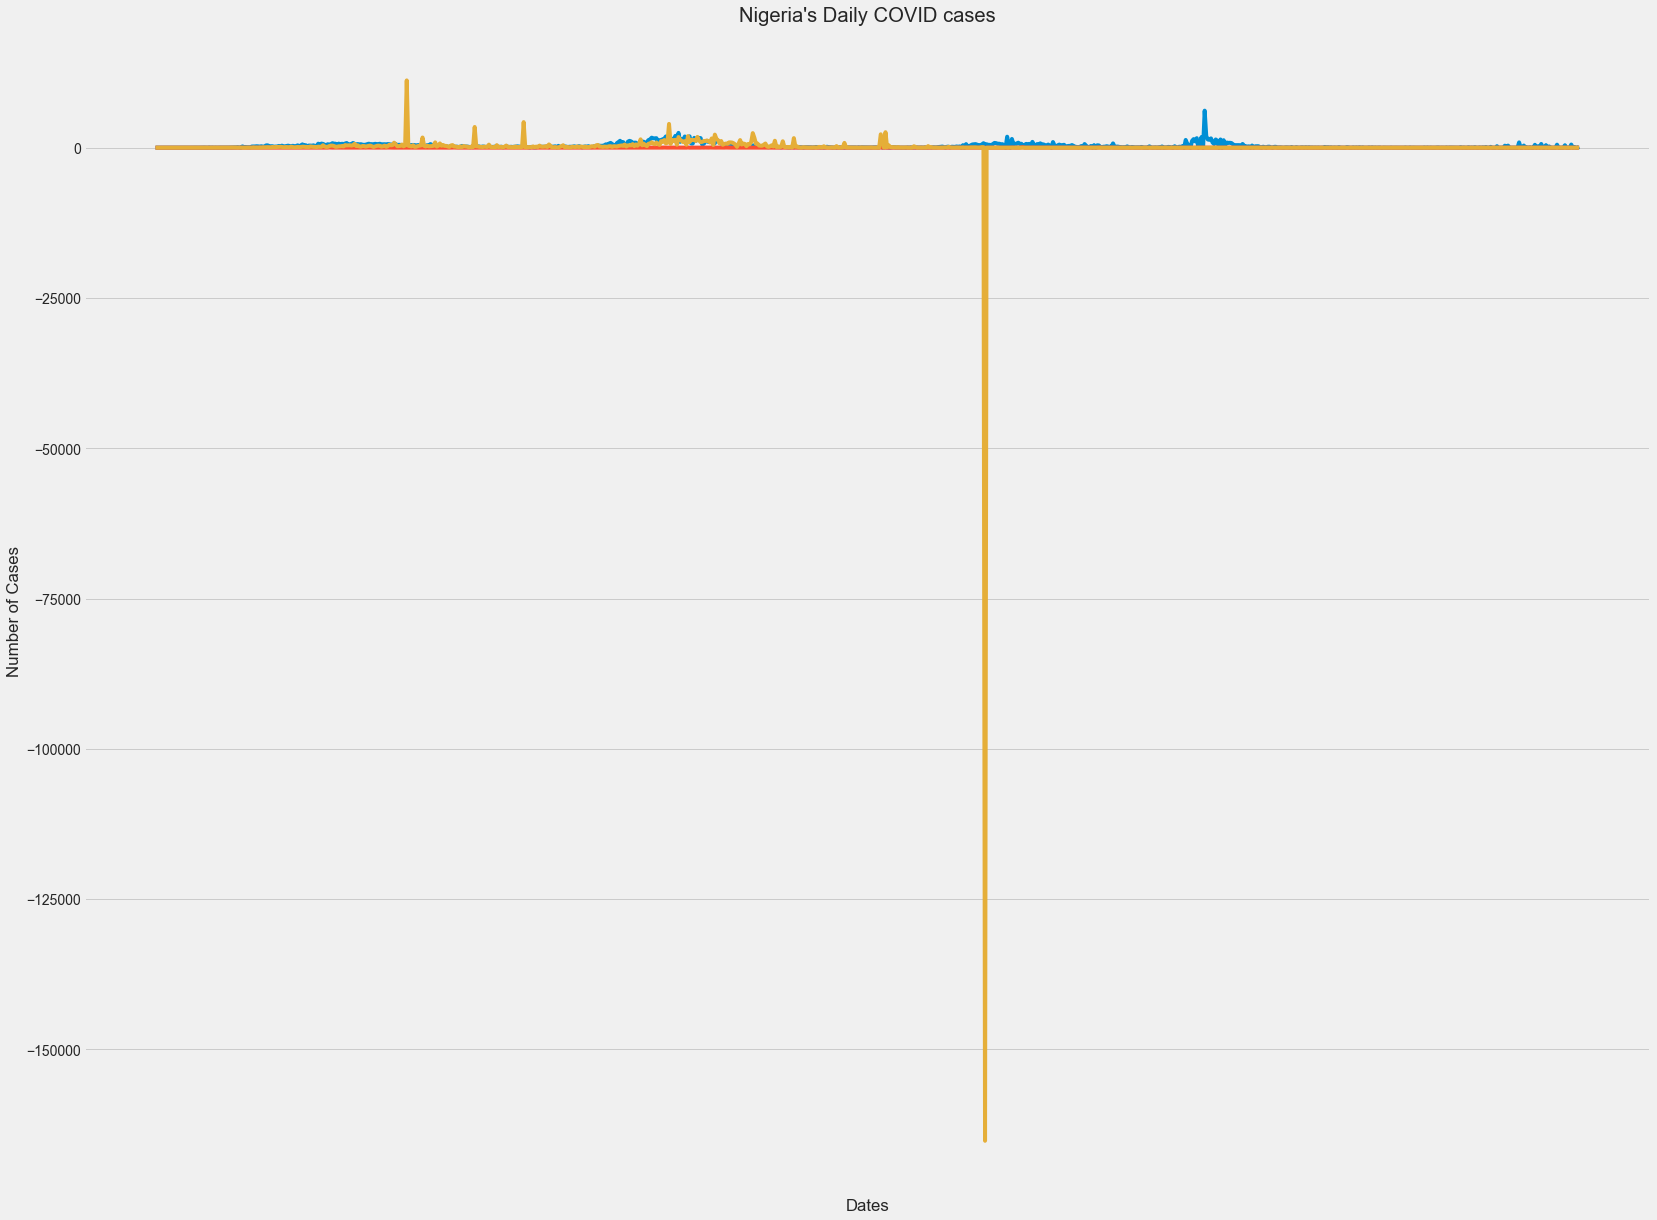

In [77]:

p = global_cases_Nigeria.index
x = global_cases_Nigeria['Nig_Daily_Confirmed']
y = global_cases_Nigeria['Nig_Daily_Death']
z = global_cases_Nigeria['Nig_Daily_Recovered']

plt.figure(figsize=[25,20])
plt.title('Nigeria\'s Daily COVID cases')
plt.xlabel('Dates')
plt.ylabel('Number of Cases')
plt.xticks([])

plt.plot(p, x, label='Daily Confirmed')
plt.plot(p, y, label='Daily Death')
plt.plot(p, z, label='Daily Recovered')




# The daily infection rate

In [78]:
global_cases_Nigeria.head(5)

,Nig_Confirmed_Cases,Nig_Death_Cases,Nig_Recovered_Cases,Nig_Daily_Confirmed,Nig_Daily_Death,Nig_Daily_Recovered
Dates,,,,,,
2/27/20,0,0,0,0.0,0.0,0.0
2/28/20,1,0,0,1.0,0.0,0.0
2/29/20,1,0,0,0.0,0.0,0.0
3/1/20,1,0,0,0.0,0.0,0.0
3/2/20,1,0,0,0.0,0.0,0.0


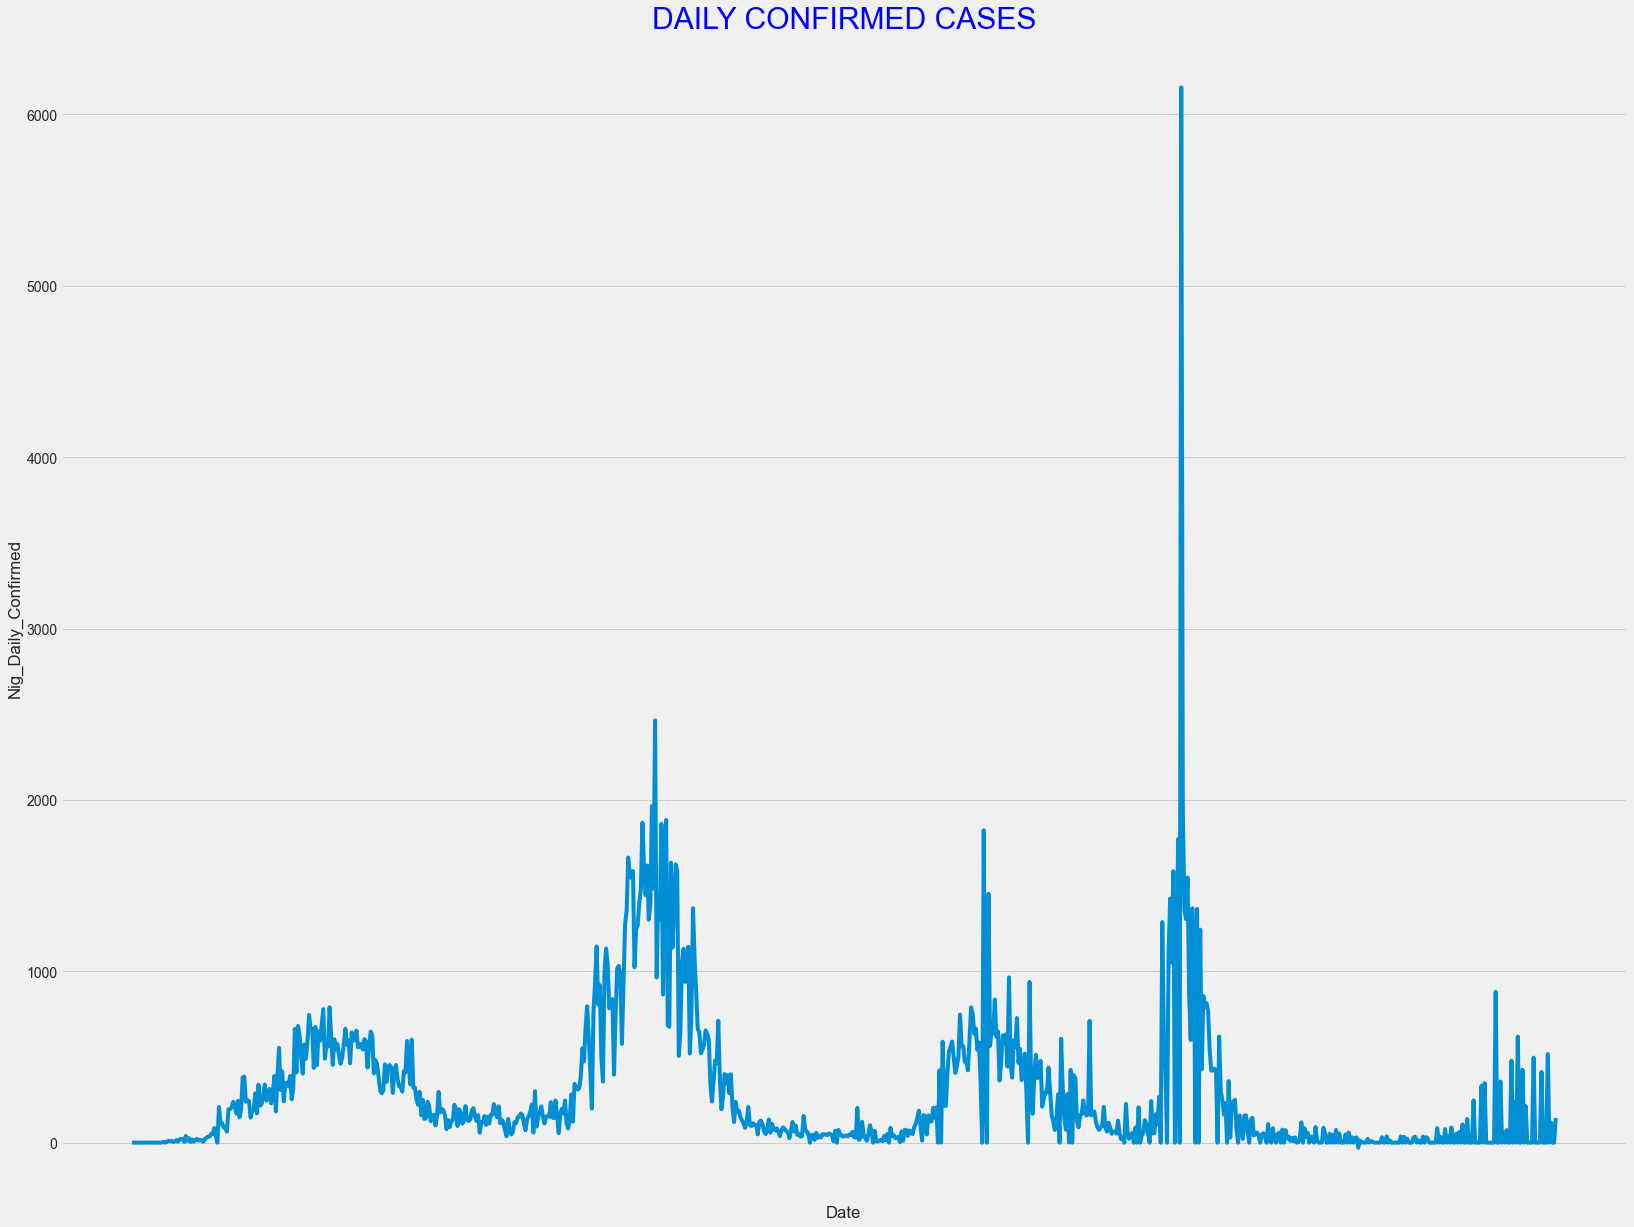

In [79]:
x = global_cases_Nigeria.index
y = global_cases_Nigeria['Nig_Daily_Confirmed']

plt.figure(figsize=[25,20])
plt.xlabel('Date')
plt.ylabel('Nig_Daily_Confirmed')
plt.title(label="DAILY CONFIRMED CASES", fontsize=30, color="blue")
plt.xticks([])

plt.plot(x,y)


# To generate the maximum infection rate for a day

In [80]:
#Write a function that checks for maximum value in a column in which the function takes in a dataset and column value
def max(dataset, i):
    #data is the dataset to be explored
    #i is the column number
    max = dataset.nlargest(1, i)
    return max

In [81]:
max(global_cases_Nigeria, 'Nig_Daily_Confirmed')

,Nig_Confirmed_Cases,Nig_Death_Cases,Nig_Recovered_Cases,Nig_Daily_Confirmed,Nig_Daily_Death,Nig_Daily_Recovered
Dates,,,,,,
12/22/21,231413,2991,0,6158.0,6.0,0.0


In [82]:
max(global_cases_Nigeria, 'Nig_Daily_Death')

,Nig_Confirmed_Cases,Nig_Death_Cases,Nig_Recovered_Cases,Nig_Daily_Confirmed,Nig_Daily_Death,Nig_Daily_Recovered
Dates,,,,,,
8/29/21,191345,2454,0,362.0,93.0,0.0


In [83]:
max(global_cases_Nigeria, 'Nig_Daily_Recovered')

,Nig_Confirmed_Cases,Nig_Death_Cases,Nig_Recovered_Cases,Nig_Daily_Confirmed,Nig_Daily_Death,Nig_Daily_Recovered
Dates,,,,,,
8/4/20,44433,910,31851,304.0,14.0,11188.0


# We want to determine the relationship between the external dataset and the NCDC COVID-19 dataset. We also need to generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis.

In [84]:
covid_external.head(5)

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [85]:
data.head(5)

,States,Confirmed_Cases,Cases_on_Admission,Discharged_Cases,Death_Cases
0,Lagos,102877,129,101977,771
1,FCT,29075,146,28680,249
2,Rivers,17680,262,17264,154
3,Kaduna,11467,11,11367,89
4,Oyo,10327,6,10119,202


In [86]:
data = data.rename(columns={'States':'states'})
ncdc_report = pd.merge(data, covid_external, on='states')

In [87]:
ncdc_report.head(5)

,states,Confirmed_Cases,Cases_on_Admission,Discharged_Cases,Death_Cases,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,102877,129,101977,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29075,146,28680,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17680,262,17264,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11467,11,11367,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10327,6,10119,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06


In [88]:
ncdc_report_relationship = ncdc_report[['states', 'Confirmed_Cases', 'Overall CCVI Index']]

In [89]:
ncdc_report_relationship['Confirmed_Cases'] = ncdc_report_relationship['Confirmed_Cases'].apply(pd.to_numeric)
ncdc_report_relationship = ncdc_report_relationship.rename(columns={'Overall CCVI Index':'Overall_CCVI_Index'})

In [90]:
ncdc_report_relationship = ncdc_report_relationship.iloc[0:10]

In [91]:
ncdc_report_relationship

,states,Confirmed_Cases,Overall_CCVI_Index
0,Lagos,102877,0.0
1,FCT,29075,0.3
2,Rivers,17680,0.4
3,Kaduna,11467,0.7
4,Oyo,10327,0.2
5,Plateau,10292,0.4
6,Edo,7821,0.1
7,Ogun,5810,0.3
8,Delta,5631,0.4
9,Ondo,5173,0.1


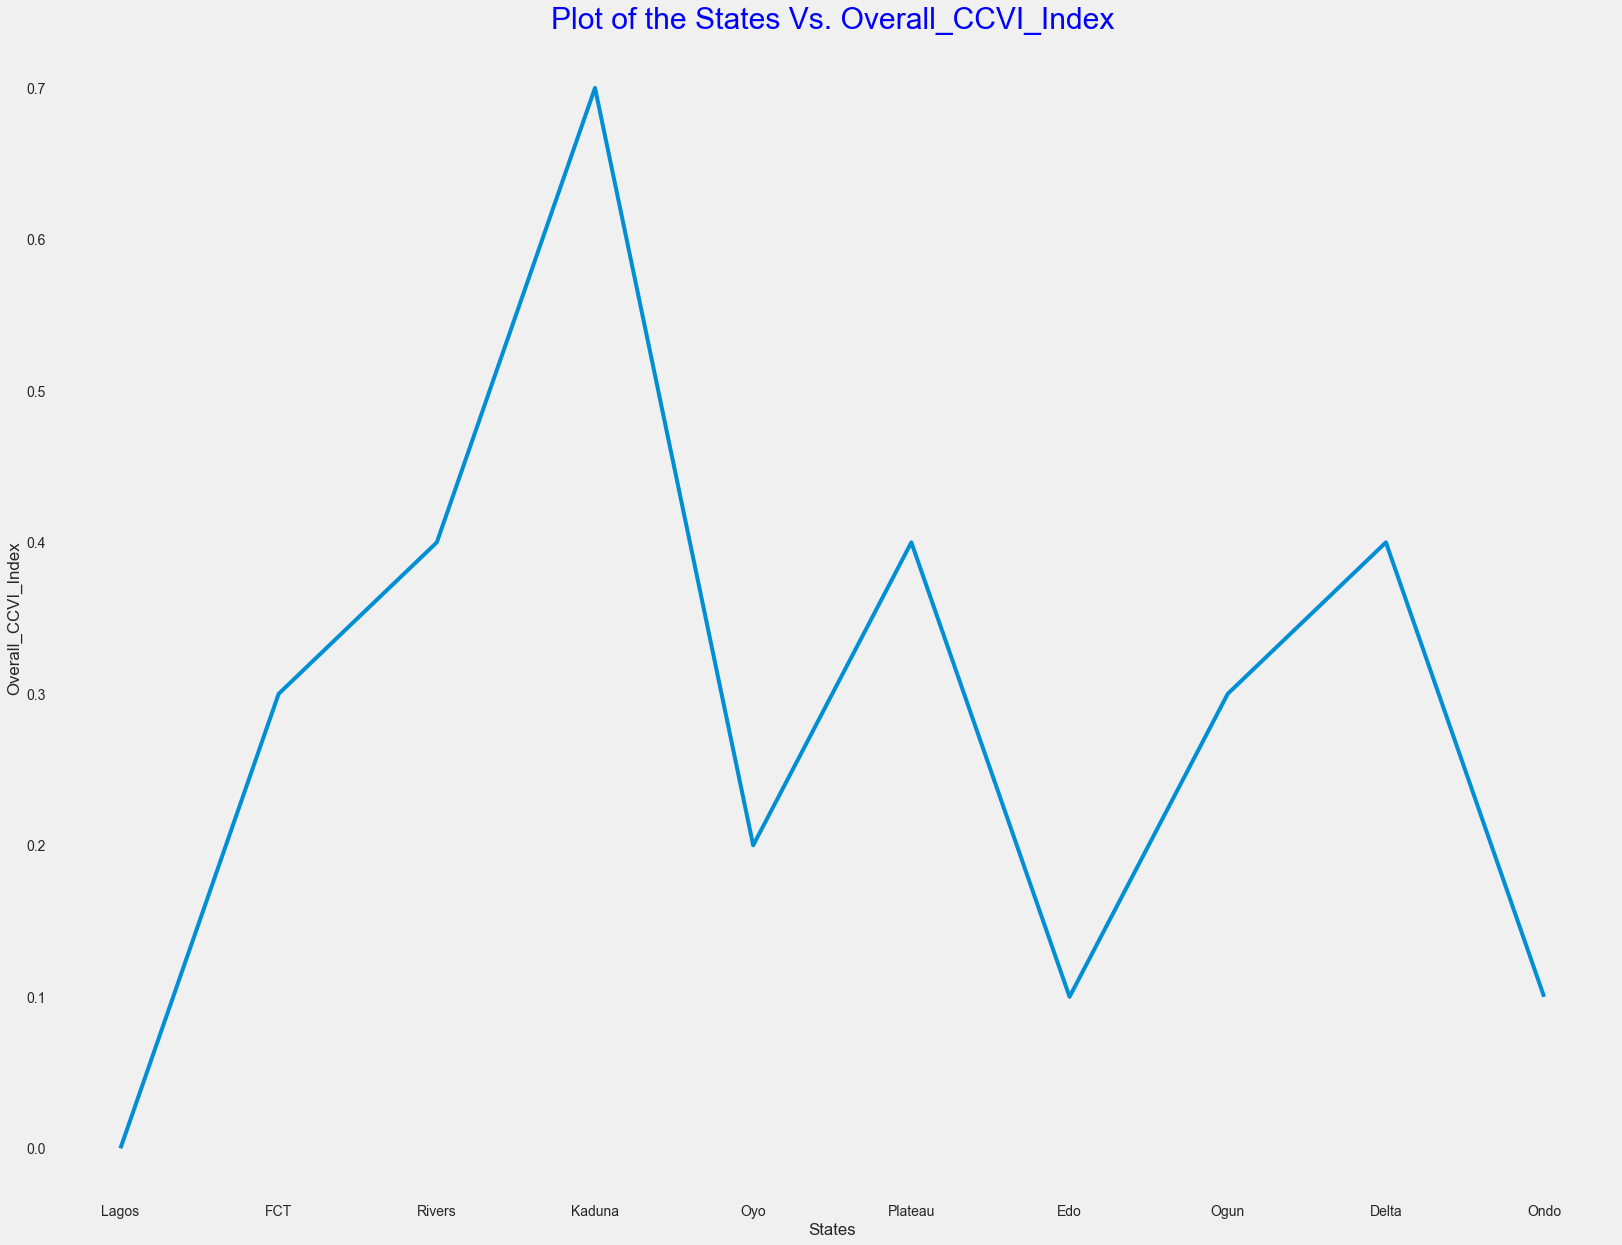

In [92]:
x = ncdc_report_relationship['states']
y = ncdc_report_relationship['Overall_CCVI_Index']
plt.figure(figsize=[25,20])
plt.xlabel('States')
plt.ylabel('Overall_CCVI_Index')
plt.title(label='Plot of the States Vs. Overall_CCVI_Index', fontsize=30, color='blue')
plt.plot(x, y)
plt.grid()
plt.show()

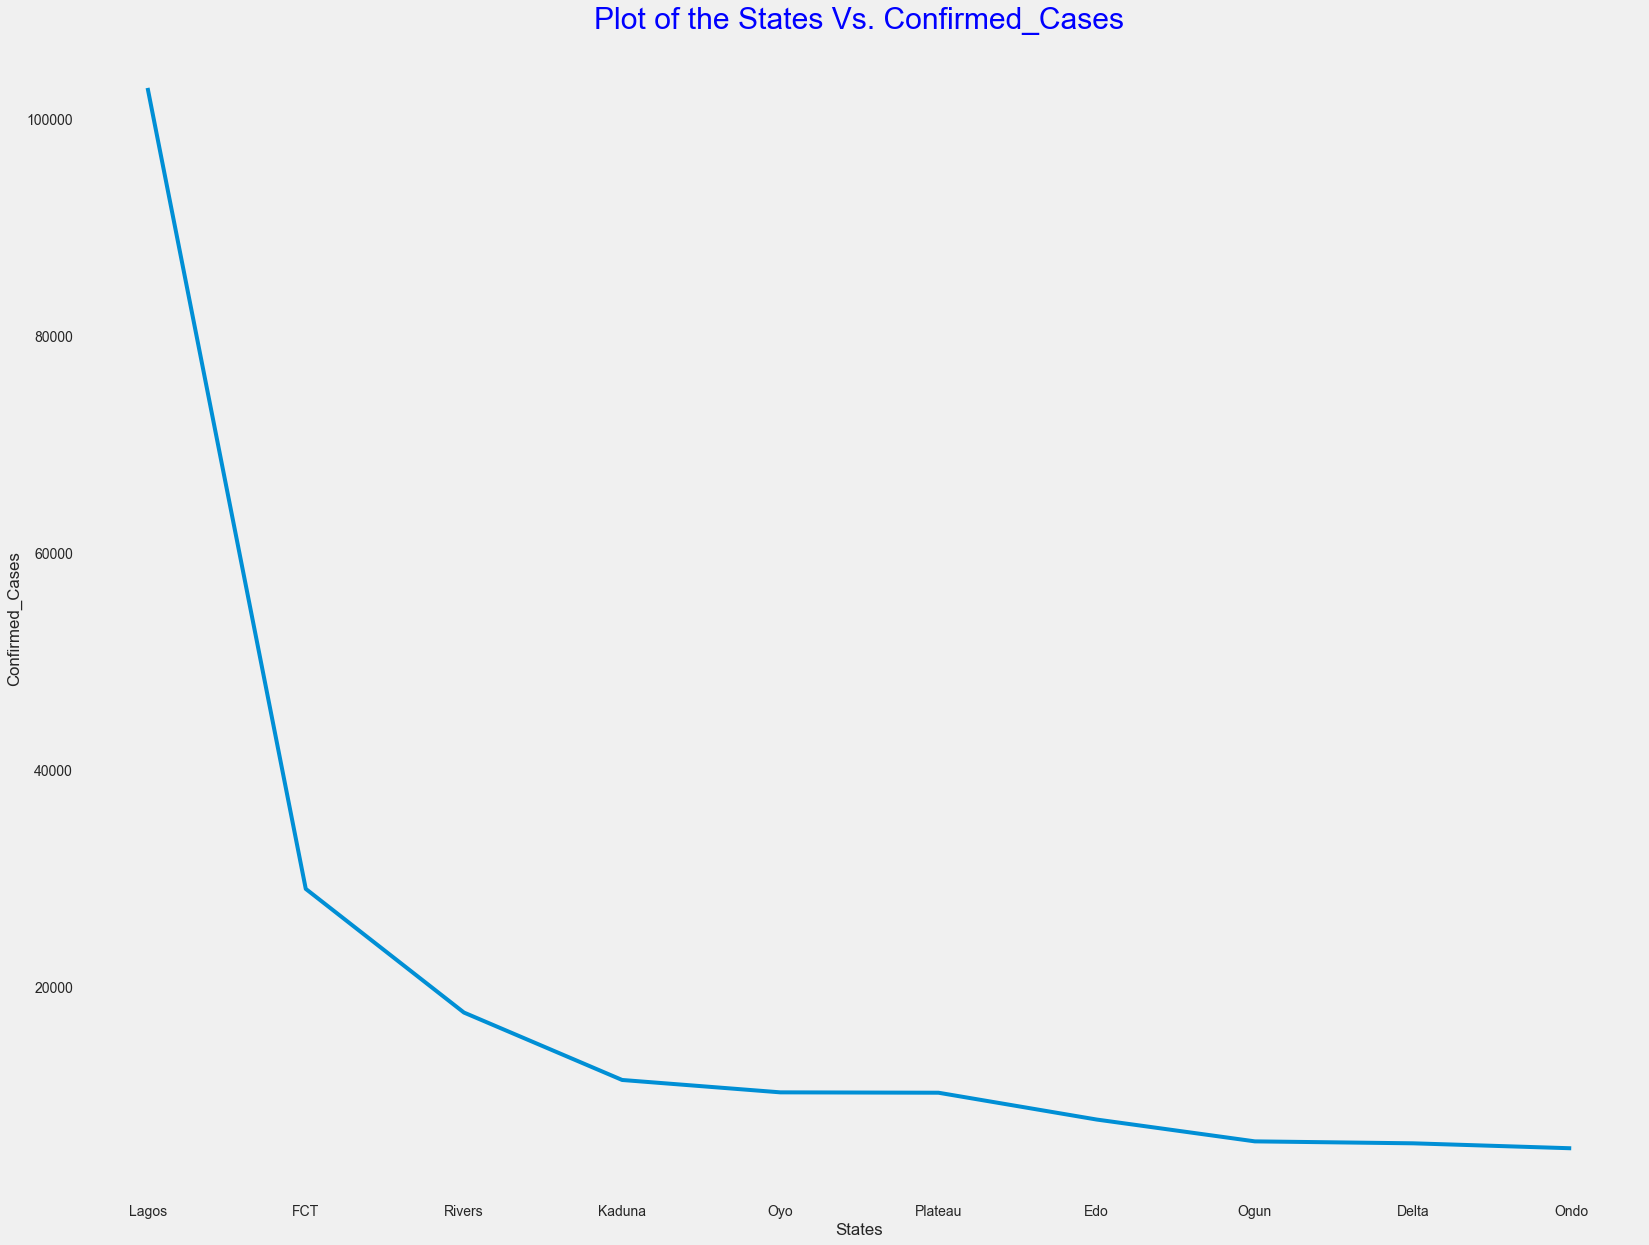

In [93]:
x = ncdc_report_relationship['states']
y = ncdc_report_relationship['Confirmed_Cases']
plt.figure(figsize=[25,20])
plt.xlabel('States')
plt.ylabel('Confirmed_Cases')
plt.title(label='Plot of the States Vs. Confirmed_Cases', fontsize=30, color='blue')
plt.plot(x, y)
plt.grid()
plt.show()

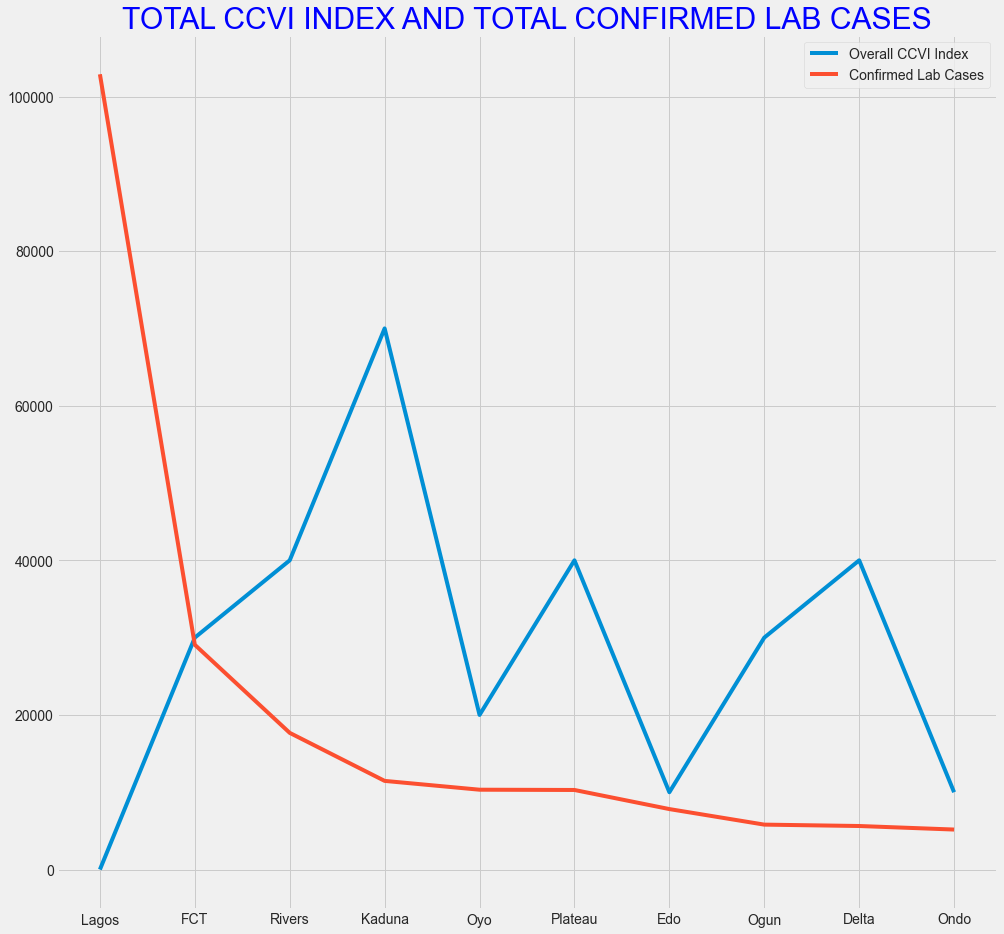

In [94]:
x = ncdc_report_relationship['states']
y = ncdc_report_relationship['Overall_CCVI_Index']
z = ncdc_report_relationship['Confirmed_Cases']
plt.figure(figsize=[15,15])

plt.title(label="TOTAL CCVI INDEX AND TOTAL CONFIRMED LAB CASES", fontsize=30, color="blue")
plt.plot(x, 100000*y)
plt.plot(x, z)
plt.legend(["Overall CCVI Index", "Confirmed Lab Cases"])

### From the graph above, it can be observed that there is no close relationship between the confirmed cases of COVID-19 in those top ten states and the overall community vulnerability index.

# To determine the relationship between the external dataset and the NCDC COVID-19 dataset

In [95]:
ncdc_report.head(5)

,states,Confirmed_Cases,Cases_on_Admission,Discharged_Cases,Death_Cases,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,102877,129,101977,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29075,146,28680,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17680,262,17264,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11467,11,11367,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10327,6,10119,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06


In [96]:
ncdc_report_relationship_1 = ncdc_report[['states', 'Confirmed_Cases', 'Population Density']]
ncdc_report_relationship_1['Confirmed_Cases'] = ncdc_report_relationship_1['Confirmed_Cases'].apply(pd.to_numeric)
ncdc_report_relationship_1['Population Density'] = ncdc_report_relationship_1['Population Density'].apply(pd.to_numeric)
ncdc_report_relationship_1.head(5)

,states,Confirmed_Cases,Population Density
0,Lagos,102877,1.0
1,FCT,29075,0.9
2,Rivers,17680,0.9
3,Kaduna,11467,0.4
4,Oyo,10327,0.6


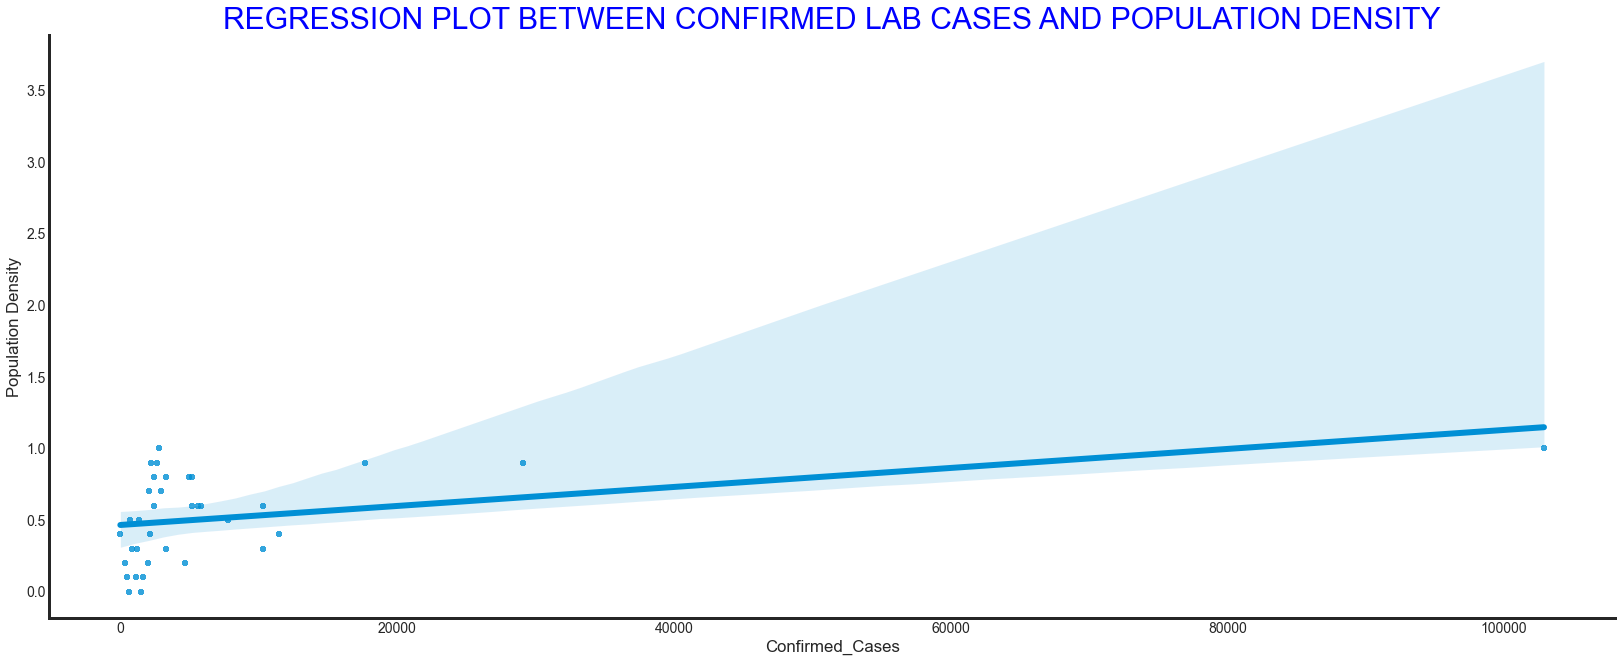

In [97]:
x = ncdc_report_relationship_1['Confirmed_Cases']
y = ncdc_report_relationship_1['Population Density']
sns.set_style("white")
plt.figure(figsize=[25,10])
plt.title(label='REGRESSION PLOT BETWEEN CONFIRMED LAB CASES AND POPULATION DENSITY', fontsize=30, color="blue")

ax = sns.regplot(x=x, y=y, marker="+", data=ncdc_report_relationship_1)
sns.despine() #removes the spines from the right and upper portion of the plot by default


In [98]:
ncdc_report.head(5)

,states,Confirmed_Cases,Cases_on_Admission,Discharged_Cases,Death_Cases,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,102877,129,101977,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29075,146,28680,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17680,262,17264,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11467,11,11367,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10327,6,10119,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06


In [99]:
ncdc_report_1 = ncdc_report[['region', 'Confirmed_Cases', 'Death_Cases']]
ncdc_report_1.head(5)

,region,Confirmed_Cases,Death_Cases
0,South West,102877,771
1,North Central,29075,249
2,South South,17680,154
3,North West,11467,89
4,South West,10327,202


Text(0.5, 1.0, 'Confirmed Lab Cases by Region')

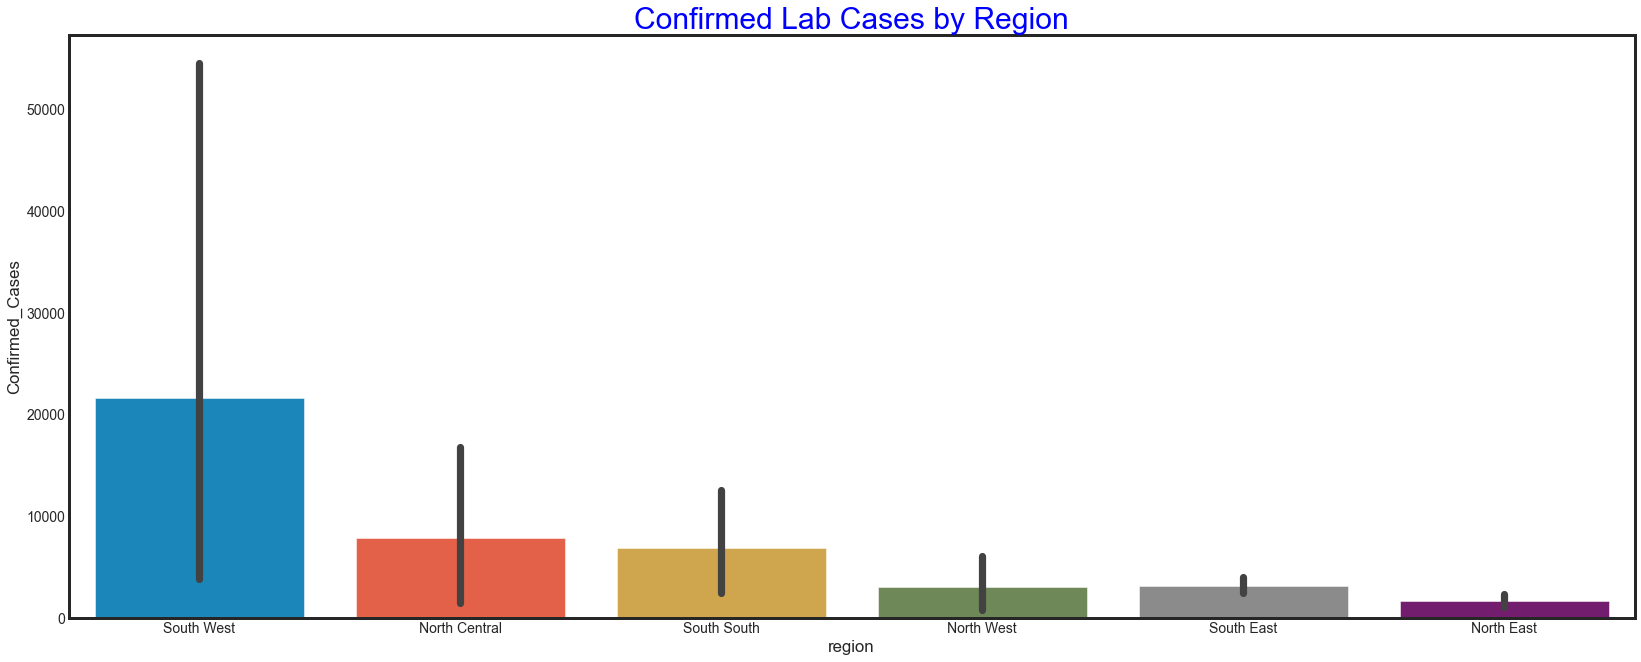

In [100]:
x = ncdc_report_1['region']
y = ncdc_report_1['Confirmed_Cases']
y = y.apply(pd.to_numeric)
sns.set_style("white")
plt.figure(figsize=[25,10])

ax = sns.barplot(x=x, y=y)
plt.title(label='Confirmed Lab Cases by Region', fontsize=30, color='blue')

# For the top ten death cases by region

In [101]:
ncdc_report_1.set_index('region', inplace=True)
ncdc_report_1.drop('Confirmed_Cases', axis=1, inplace=True)
ncdc_report_1.head(5)

,Death_Cases
region,
South West,771
North Central,249
South South,154
North West,89
South West,202


In [102]:
ncdc_report_1['Death_Cases'] = ncdc_report_1['Death_Cases'].apply(pd.to_numeric)
top_ten_death_cases = ncdc_report_1['Death_Cases'].sort_values(ascending=False)[0:10]

In [103]:
top_ten_death_cases

region
South West       771
South South      321
North Central    249
South West       202
South South      154
North West       127
South South      112
South West       109
South West        92
North West        89
Name: Death_Cases, dtype: int64

([<matplotlib.patches.Wedge at 0x16124bdd340>,
 [Text(0.47994243007321313, 0.9897753602789974, 'South West'),
  Text(-0.9426280180675879, 0.5669677411934224, 'North Central'),
  Text(-1.09895691267918, -0.04789263069246991, 'South South'),
  Text(-1.0147330255209048, -0.42463735930460844, 'North West'),
  Text(-0.7514172074605319, -0.8033505961485409, 'South West'),
  Text(-0.3770557717796914, -1.0333580913544063, 'North Central'),
  Text(0.24544014682354645, -1.0722682193962647, 'South South'),
  Text(0.7967749603597816, -0.758386222543414, 'South West'),
  Text(0.9761621149950179, -0.5070577139226397, 'South South'),
  Text(1.0862565772676673, -0.17333969061565951, 'South West')],
 [Text(0.26178678003993444, 0.5398774692430894, '36%'),
  Text(-0.5141607371277751, 0.3092551315600485, '12%'),
  Text(-0.5994310432795527, -0.026123253104983587, '7%'),
  Text(-0.5534907411932207, -0.23162037780251366, '4%'),
  Text(-0.40986393134210825, -0.4381912342628404, '9%'),
  Text(-0.20566678460710

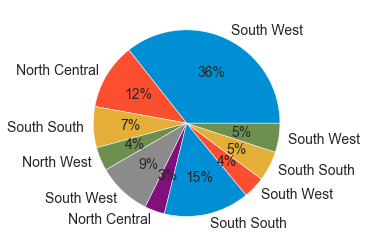

In [104]:
region = ncdc_report_1.index[0:10]
top_ten_death_cases = ncdc_report_1.Death_Cases[0:10]

plt.pie(top_ten_death_cases, labels=region, autopct='%.0f%%')

In [105]:
RealGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [106]:
RealGDP_melt = pd.melt(RealGDP, id_vars='Year')

In [107]:
RealGDP_melt

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


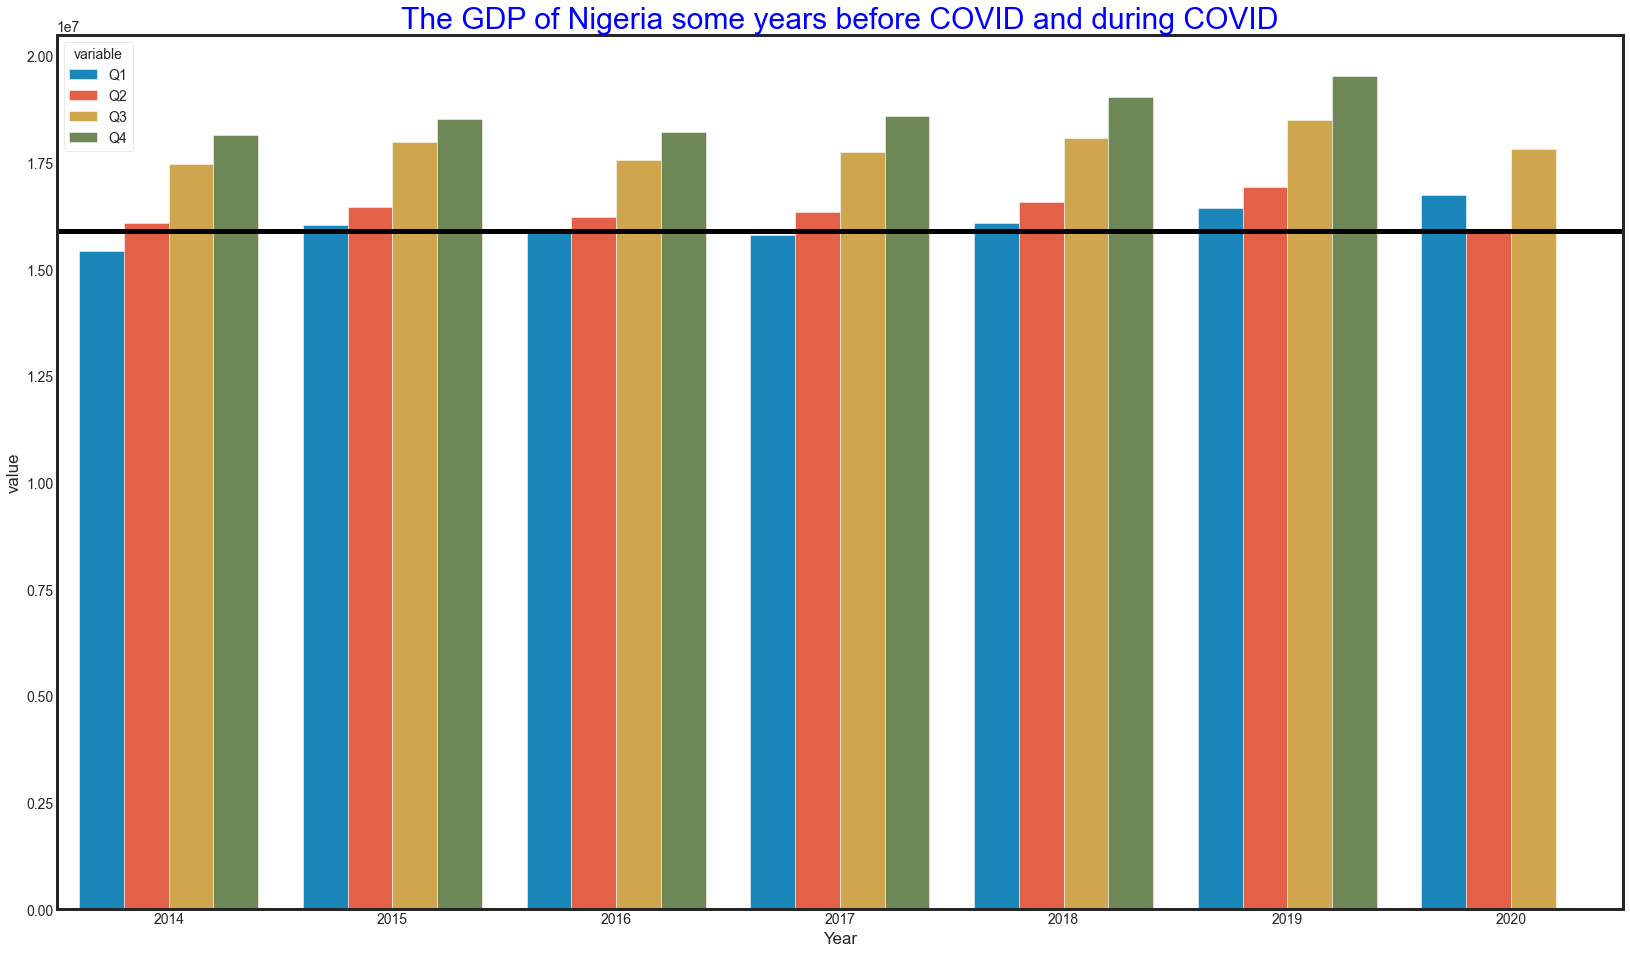

In [108]:
x = RealGDP_melt['Year']
y = RealGDP_melt['value']
sns.set_style("white")
plt.figure(figsize=[25,15])

ax = sns.barplot(x=x, y=y, hue='variable', data=RealGDP_melt)
plt.title(label='The GDP of Nigeria some years before COVID and during COVID', fontsize=30, color='blue')
ax.axhline(y = 15890000.00, linewidth = 5, color = "black") #This draws an axhline through the graph at the value of Q2 = 2020

# The plot indicates that the covid period (Q2) of 2020 recorded the lowest Q2 value from 2014 - 2020. This indicates the negative impact of covid on the economy for that period.